Title: 
    
Analysis of Algerian Forest Fires: An Inferential Explanation of Possible Correlation.

Introduction: 

Large sections of forest are destroyed everyday by forest fires. Not only do these types of natural disasters destroy the trees but they also exterminate and displace wildlife within the threatened ecosystem. Consequently, it would be of great beneficence to be able to pinpoint major factors(atmospheric conditions) contributing to these phenomena(forest fires) and allow for possible combatant scaffolding to be deduced.  The following research will examine a dataset (“Algerian_forest_fires_dataset_UPDATE.csv”) that contains a total of 244 instances of forest fires in two regions of Algeria(Bejaia region and Sidi Bel-abbes region) that were gathered between June and September of 2012. Since the most predominant cause of forest fires is lightning on dry trees and soil in low moisture conditions. To begin we will compare the "RH" column to “Temperature” column. We will analyze each variable to see if there is a correlation between that variable and the possible outcome of fire with respect to RH. 

Preliminary exploratory data analysis:

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library("readxl")
library(tidymodels)
library(lubridate)
library(ggplot2)
library(forcats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

The dataset can be read into R using the following read_csv function:Forest_fire <- read.csv("Project/Algerian_forest_fires_dataset_UPDATE.csv", skip=1), however, the dataset is actually consisting of 2 tables and we decided to separate it into two csv files. Hence we would use Bejaia <- read.csv("Bejaia.csv", skip=1), and Sidi_Bel_Abbes <- read_csv("Sidi_Bel_Abbes.csv", skip=1).

In [2]:
Bejaia <- read.csv("Bejaia.csv", skip=1)
Bejaia
Sidi_Bel_Abbes <- read_csv("Sidi_Bel_Abbes.csv", skip=1)
Sidi_Bel_Abbes

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire


Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_character(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_character(),
  Classes = col_character()
)



day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire
9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire


In [14]:
Sidi_Bel_Abbes <- Sidi_Bel_Abbes %>% mutate(Classes = as_factor(Classes)) %>%
mutate(date = make_date(year, month, day)) %>%
select(-day,-month,-year)
Sidi_Bel_Abbes

Bejaia <- Bejaia %>% mutate(Classes = as_factor(Classes)) %>%
mutate(date = make_date(year, month, day)) %>%
select(-day,-month,-year)
Bejaia

Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<date>
32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2012-06-01
30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2012-06-02
29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2012-06-03
30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,2012-06-04
32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2012-06-05
35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2012-06-06
35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,2012-06-07
28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2012-06-08
27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2012-06-09


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<date>
29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04
27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05
31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,2012-06-06
33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,2012-06-07
30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,2012-06-08
25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,2012-06-09


We decide to split the dataset into one training set and one testing set, with a 3:1 proportion.

In [16]:
Sidi_Bel_Abbes_split<- initial_split(Sidi_Bel_Abbes, prop = 0.75, strata = Classes)  
Sidi_Bel_Abbes_train <- training(Sidi_Bel_Abbes_split)   
Sidi_Bel_Abbes_test <- testing(Sidi_Bel_Abbes_split)
Sidi_Bel_Abbes_train
Sidi_Bel_Abbes_test

Bejaia_split<- initial_split(Bejaia, prop = 0.75, strata = Classes)  
Bejaia_train <- training(Bejaia_split)   
Bejaia_test <- testing(Bejaia_split)
Bejaia_train
Bejaia_test

Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<date>
32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2012-06-01
29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2012-06-03
30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,2012-06-04
35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2012-06-06
28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2012-06-08
30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10,fire,2012-06-10
31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,fire,2012-06-11
27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,fire,2012-06-12
27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,not fire,2012-06-14


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<date>
30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2012-06-02
32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2012-06-05
35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,2012-06-07
27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2012-06-09
30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9,not fire,2012-06-13
33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4,not fire,2012-06-18
32,55,14,0.0,86.2,8.3,18.4,5.0,8.2,4.9,fire,2012-06-21
34,58,18,0.0,88.0,13.6,36.8,8.0,14.1,9.9,fire,2012-07-04
37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NA,2012-07-14


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<date>
1,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
2,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
3,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
4,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04
5,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05
7,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,2012-06-07
8,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,2012-06-08
12,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,fire,2012-06-12
13,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,not fire,2012-06-13


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<date>
6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,2012-06-06
9,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,2012-06-09
10,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,2012-06-10
11,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire,2012-06-11
17,30,89,16,0.6,37.3,1.1,7.8,0.0,1.6,0.0,not fire,2012-06-17
19,31,55,16,0.1,79.9,4.5,16.0,2.5,5.3,1.4,not fire,2012-06-19
29,32,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,not fire,2012-06-29
39,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,not fire,2012-07-09
47,29,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,fire,2012-07-17


Methods:
    
We will compose a scatter plot. The x axis will be the Temperature, the y axis will be the Relative Humidity, and the dots will be colored relative to Classes and shaped to region. This can allow for us to suggest scaffolding to base further analysis on. We also want to explore whether the Humidity in the area is a major factor in the possibility of fire breaking out. However in our plot, we find that there are both 3 fire and not fire. We have tested all the datasets(even the initial one), and we also asked TA fo help. We believe that the ggplot2 function thinks that there are mutiple fire and not fire variables.

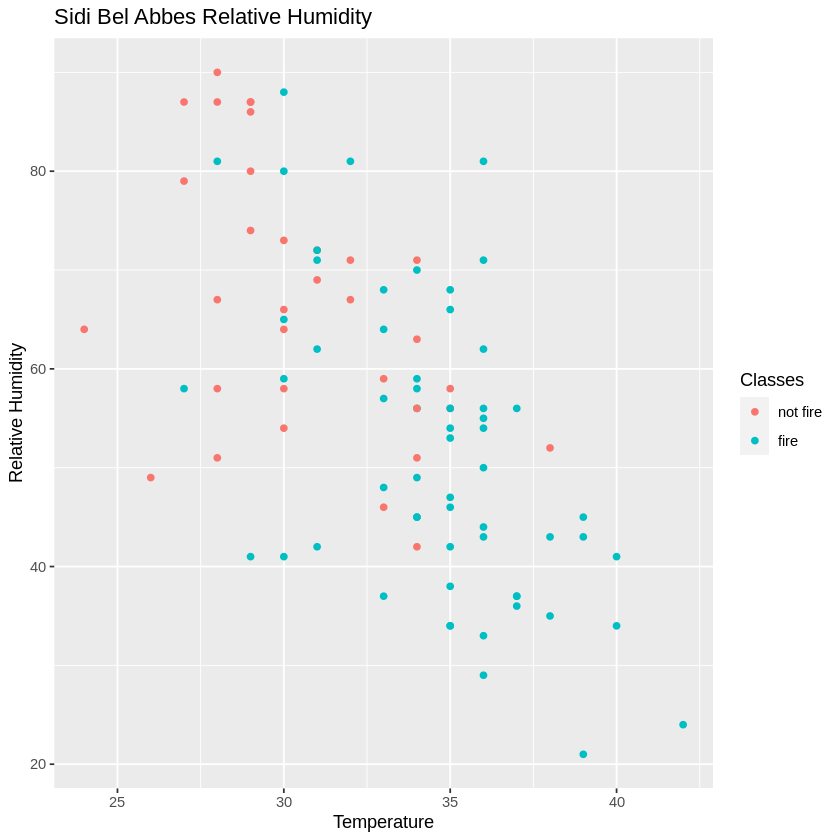

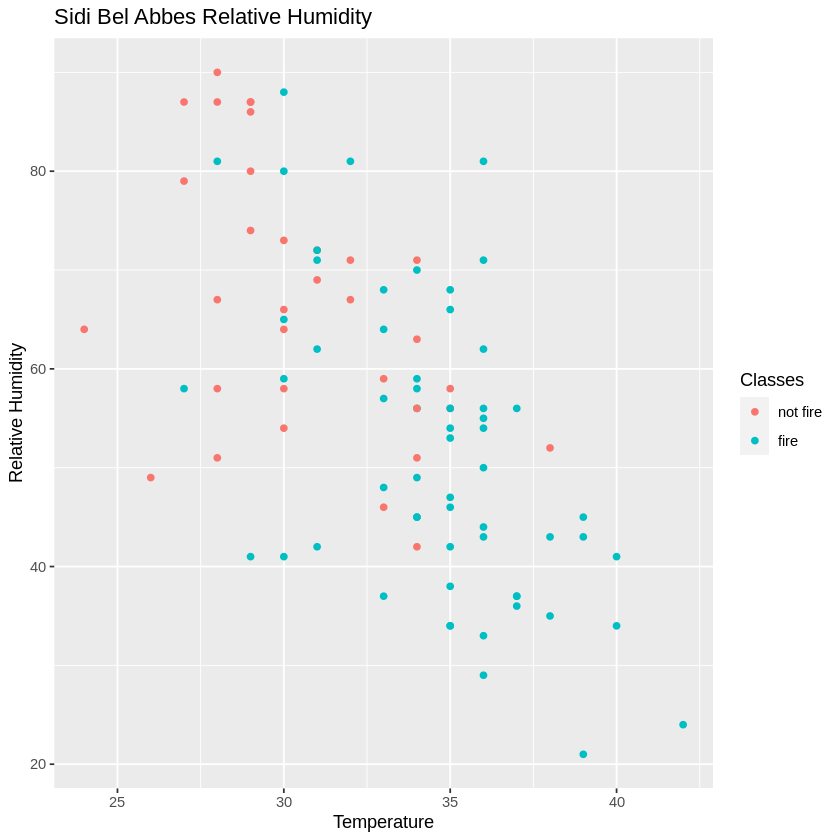

In [19]:
Sidi_Bel_Abbes_RH <- Sidi_Bel_Abbes_train %>% 
select(Temperature, RH, Classes)%>%
filter(Classes != "NA") %>%
ggplot(aes(x=Temperature, y= RH, color = Classes))+
geom_point()+
xlab("Temperature")+
ylab("Relative Humidity")+
labs(title="Sidi Bel Abbes Relative Humidity")
Sidi_Bel_Abbes_RH

Bejaia_RH <- Bejaia_train %>% 
select(Temperature, RH, Classes)%>%
filter(Classes != "NA") %>%
ggplot(aes(x=Temperature, y= RH, color = Classes))+
geom_point()+
xlab("Temperature")+
ylab("Relative Humidity")+
labs(title="Bejaia Relative Humidity")
Sidi_Bel_Abbes_RH



Expected outcomes and significance:

 In this study we expect to discover a relationship between the most contributing atmospheric condition(s) of the area to the presence of fire. If we can determine a reliable relationship we can attempt to predict areas with a high likelihood of fire. This information can alos allow proper allocation of fire fighting resources to vulnerable areas. We hope our findings can lead to a better understanding of how and why fires occur in forests and how the changing global climate will affect the location and frequency of forest fires.
    